#Data

In [ ]:
from fiona import listlayers

russiaMapsLink="https://github.com/tatiana4321/TareaExtra/raw/main/RusiaMaps_3576.gpkg"
#layers in maps
listlayers(russiaMapsLink)

['country', 'cities', 'rivers', 'airports']

Let's read in the data:

In [ ]:
import geopandas as gpd

country=gpd.read_file(russiaMapsLink,layer='country')
cities=gpd.read_file(russiaMapsLink,layer='cities')
rivers=gpd.read_file(russiaMapsLink,layer='rivers')
airports=gpd.read_file(russiaMapsLink,layer='airports')

Adding seaports data. Let's read the UpdatedPub150.csv from the GitHub repo:

In [ ]:
import pandas as pd

portsFileLink="https://github.com/tatiana4321/TareaExtra/raw/main/UpdatedPub150.csv"
infoseaports=pd.read_csv(portsFileLink)

#columns available (so many)
infoseaports.columns.to_list()

['OID_',
 'World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'IHO S-130 Sea Area',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearan

Doing some preprocessing:

In [ ]:
#rename
infoseaports.rename(columns={'Main Port Name':'portName', 'Country Code':'countryCode'},inplace=True)

#keep few columns
infoseaports=infoseaports.loc[:,['portName', 'countryCode','Latitude', 'Longitude']]

# we have now
infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3801 entries, 0 to 3800
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   portName     3801 non-null   object 
 1   countryCode  3801 non-null   object 
 2   Latitude     3801 non-null   float64
 3   Longitude    3801 non-null   float64
dtypes: float64(2), object(2)
memory usage: 118.9+ KB


In [ ]:
infoseaports.head()

portName    countryCode   Latitude  Longitude
0             Maurer  United States  40.533333 -74.250000
1            Iharana     Madagascar -13.350000  50.000000
2            Andoany     Madagascar -13.400000  48.300000
3        Chake Chake       Tanzania  -5.250000  39.766667
4  Mjimwema Terminal       Tanzania  -6.816667  39.366667

Turning the points into projected spatial object (GDF of points)

In [ ]:
#spatial points (unprojected)
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                           geometry=gpd.points_from_xy(infoseaports.Longitude,
                                                       infoseaports.Latitude),
                          crs=4326)

# keep Russia
seaports_ru=seaports[seaports['countryCode']=='Russia'].copy()

# reset indexes
seaports_ru.reset_index(drop=True, inplace=True)

# reprojecting
seaports_ru_3576=seaports_ru.to_crs(3576) # projected crs

In [ ]:
seaports_ru_3576.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   portName     67 non-null     object  
 1   countryCode  67 non-null     object  
 2   Latitude     67 non-null     float64 
 3   Longitude    67 non-null     float64 
 4   geometry     67 non-null     geometry
dtypes: float64(2), geometry(1), object(2)
memory usage: 2.7+ KB


Plotting seaports along with the large airports:

In [ ]:
airports.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1651 entries, 0 to 1650
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           1651 non-null   object  
 1   kind           1651 non-null   object  
 2   latitude_deg   1651 non-null   float64 
 3   longitude_deg  1651 non-null   float64 
 4   elevation_ft   1034 non-null   float64 
 5   region_name    1651 non-null   object  
 6   municipality   1536 non-null   object  
 7   geometry       1651 non-null   geometry
dtypes: float64(3), geometry(1), object(4)
memory usage: 103.3+ KB


<Axes: >

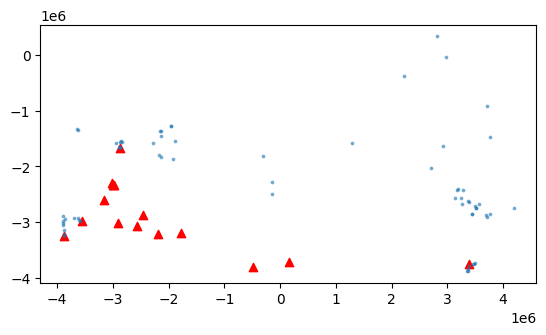

In [ ]:
# subsetting
largeAirports=airports[airports['kind']=='large_airport'] #can't use "airports.type"
largeAirports.reset_index(drop=True, inplace=True)

#plotting
base=largeAirports.plot(color='red',marker="^")
seaports_ru_3576.plot(ax=base,alpha=0.5,markersize=3)

#Exercise 1 (Distance between two points)

1. Use two maps of points from your country.

2. Compute the distance matrix for both maps.

3. Select one row of the distance matrix, and plot the two points with the minimal distance on top of the country of your choosing.

In [ ]:
seaports_ru_3576.head()

portName countryCode   Latitude   Longitude  \
0     Bukhta Vanino      Russia  49.083333  140.283333   
1  Sovetskaya Gavan      Russia  48.973611  140.268056   
2           Lazarev      Russia  52.216667  141.516667   
3         De Kastri      Russia  51.466667  140.783333   
4      Novorossiysk      Russia  44.716667   37.783333   

                            geometry  
0   POINT (3435999.476 -2854310.567)  
1   POINT (3444029.436 -2862533.492)  
2   POINT (3239715.833 -2575447.993)  
3   POINT (3267591.924 -2666566.103)  
4  POINT (-3887184.998 -3013399.055)

In [ ]:
largeAirports.head()

name           kind  latitude_deg  \
0  Domodedovo International Airport  large_airport     55.408798   
1                   Pulkovo Airport  large_airport     59.800301   
2     Vnukovo International Airport  large_airport     55.591499   
3       Sochi International Airport  large_airport     43.449902   
4    Novosibirsk Tolmachevo Airport  large_airport     55.019756   

   longitude_deg  elevation_ft              region_name    municipality  \
0      37.906300         588.0            Moscow Oblast          Moscow   
1      30.262501          78.0  Saint Petersburg (city)  St. Petersburg   
2      37.261501         685.0            Moscow (city)          Moscow   
3      39.956600          89.0           Krasnodar Krai           Sochi   
4      82.618675         365.0       Novosibirsk Oblast     Novosibirsk   

                            geometry  
0  POINT (-2999019.609 -2335202.716)  
1  POINT (-2877333.690 -1678852.818)  
2  POINT (-3009648.144 -2289543.230)  
3  POINT (-3869472.854 -3241881.698)  
4   POINT (-493628.256 -3810450.645)

Let's compute all possible distances between those GDFs

In [ ]:
seaports_ru_3576.set_index('portName').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000)

name              Domodedovo International Airport  Pulkovo Airport  \
portName                                                              
Bukhta Vanino                          6455.923139      6421.828133   
Sovetskaya Gavan                       6464.592697      6431.230963   
Lazarev                                6243.359489      6182.408736   
De Kastri                              6275.366268      6223.800152   
Novorossiysk                           1117.491849      1673.563062   
...                                            ...              ...   
Shakhtersk                             6527.934940      6481.213908   
Poronaysk                              6570.188807      6515.955069   
Uglegorsk                              6533.639372      6487.608422   
Nikol Skoye                            6854.754046      6629.536376   
Vladivostok                            6554.810827      6614.909703   

name              Vnukovo International Airport  Sochi International Airport  \
portName                                                                       
Bukhta Vanino                       6470.342756                  7315.745850   
Sovetskaya Gavan                    6479.064141                  7323.333995   
Lazarev                             6255.900546                  7140.356971   
De Kastri                           6288.552227                  7160.215197   
Novorossiysk                        1137.557993                   229.168144   
...                                         ...                          ...   
Shakhtersk                          6541.533091                  7402.771904   
Poronaysk                           6583.295370                  7453.872155   
Uglegorsk                           6547.285726                  7407.515515   
Nikol Skoye                         6855.928948                  7924.734239   
Vladivostok                         6575.403087                  7283.367278   

name              Novosibirsk Tolmachevo Airport  Koltsovo Airport  \
portName                                                             
Bukhta Vanino                        4044.277187       5231.893274   
Sovetskaya Gavan                     4050.147532       5239.379710   
Lazarev                              3932.313523       5062.499630   
De Kastri                            3931.316458       5079.901028   
Novorossiysk                         3485.902838       2110.069928   
...                                          ...               ...   
Shakhtersk                           4150.188766       5320.514439   
Poronaysk                            4213.024654       5372.862279   
Uglegorsk                            4153.367369       5325.123446   
Nikol Skoye                          5097.537488       5943.880651   
Vladivostok                          3887.418097       5212.046662   

name              Vladivostok International Airport  \
portName                                              
Bukhta Vanino                            893.546090   
Sovetskaya Gavan                         885.776665   
Lazarev                                 1181.032157   
De Kastri                               1087.208968   
Novorossiysk                            7315.190470   
...                                             ...   
Shakhtersk                              1013.824870   
Poronaysk                               1088.706966   
Uglegorsk                               1007.160045   
Nikol Skoye                             2838.634738   
Vladivostok                               37.245523   

name              Kazan International Airport  Kurumoch International Airport  \
portName                                                                        
Bukhta Vanino                     5901.985698                     6004.142637   
Sovetskaya Gavan                  5910.006760                     6011.872834   
Lazarev                           5713.025342                     5825.195988   
De 

In [ ]:
#Reording previous output
seaports_ru_3576.set_index('portName').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).sort_index(axis=0).sort_index(axis=1)

name                         Domodedovo International Airport  \
portName                                                        
Adler                                             1258.344216   
Aleksandrovsk -Sakhalinskiy                       6382.069669   
Anapa                                             1101.248805   
Arkhangels'k                                       992.548097   
Azov                                               879.103067   
...                                                       ...   
Vladivostok                                       6554.810827   
Vostochnyy                                        6645.816719   
Vyborg                                             797.577309   
Yeysk                                              910.205521   
Zarubino                                          6552.770408   

name                         Gagarin International Airport  \
portName                                                     
Adler                                           993.404835   
Aleksandrovsk -Sakhalinskiy                    6291.864803   
Anapa                                           996.616391   
Arkhangels'k                                   1413.192551   
Azov                                            708.575173   
...                                                    ...   
Vladivostok                                    6342.170228   
Vostochnyy                                     6439.444895   
Vyborg                                         1470.679184   
Yeysk                                           802.914983   
Zarubino                                       6331.279836   

name                         Kazan International Airport  Koltsovo Airport  \
portName                                                                     
Adler                                        1455.664994       2087.768179   
Aleksandrovsk -Sakhalinskiy                  5847.333874       5192.537227   
Anapa                                        1435.974609       2124.846341   
Arkhangels'k                                 1081.927641       1408.319432   
Azov                                         1147.828378       1838.221406   
...                                                  ...               ...   
Vladivostok                                  5931.316305       5212.046662   
Vostochnyy                                   6026.561464       5309.746629   
Vyborg                                       1360.701656       1946.199202   
Yeysk                                        1233.751564       1933.616785   
Zarubino                                     5923.520760       5200.707695   

name                         Krasnoyarsk International Airport  \
portName                                                         
Adler                                              4061.679718   
Aleksandrovsk -Sakhalinskiy                        3394.705933   
Anapa                                              4127.518039   
Arkhangels'k                                       2977.167323   
Azov                                               3844.376794   
...                                                        ...   
Vladivostok                                        3232.652454   
Vostochnyy                                         3335.166504   
Vyborg                                             3694.095649   
Yeysk                                              3942.103058   
Zarubino                                           3213.848293   

name                         Kurumoch International Airport  Lipetsk Air Base  \
portName                                                                        
Adler                                           1318.661088        955.897822   
Aleksandrovsk -Sakhalinskiy                     5957.479669       6538.495802   
Anapa                                           1337.789731        823.684631   
Arkhangels'k                                    1310.935111       12

In [ ]:
# Saving it

distanceMatrixKM_sea_air= seaports_ru_3576.set_index('portName').geometry.apply\
                          (lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
                          sort_index(axis=0).sort_index(axis=1)

*Select one row of the distance matrix, and plot the two points with the minimal distance on top of the country of your choosing.*

In [ ]:
anapa_distances = distanceMatrixKM_sea_air.loc['Anapa']
closest_airport = anapa_distances.idxmin()
min_distance = anapa_distances.min()

In [ ]:
seaports = seaports_ru_3576.set_index('portName')
airports = largeAirports.set_index('name')
ru = country[country.COUNTRY=='Russia']

<Axes: >

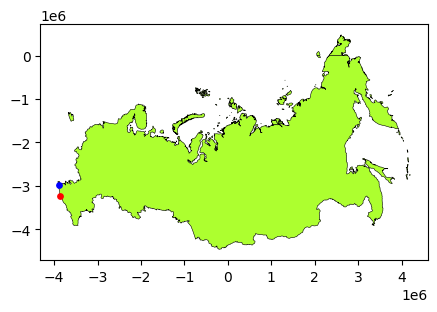

In [ ]:
base = ru.plot(facecolor="greenyellow", edgecolor='black', linewidth=0.4,figsize=(5,5))
seaports.loc[['Anapa']].plot(ax=base, color='blue', markersize=15, label='Anapa Port')
airports.loc[[closest_airport]].plot(ax=base, color='red', markersize=15, label=closest_airport)

#Exercise 2 (Distance between line and point)

1. Use a map of points and a map of lines from your country.

2. Compute the distance matrix for both.

3. Select one line of the distance matrix, and plot the closests and the farthest point to that line.

Let's take a look at the rivers we have:

In [ ]:
rivers.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   NAME      18 non-null     object  
 1   SYSTEM    6 non-null      object  
 2   geometry  18 non-null     geometry
dtypes: geometry(1), object(2)
memory usage: 560.0+ bytes


In [ ]:
distanceMatrixKM_riv_air=rivers.set_index('NAME').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)
distanceMatrixKM_riv_air

name     Domodedovo International Airport  Gagarin International Airport  \
NAME                                                                       
Aldan                         4864.775730                    4829.445667   
Amur                          5200.651184                    5001.416491   
Angara                        3401.368853                    3135.261274   
Dnieper                        253.343981                     938.860370   
Don                            141.966632                     288.423010   
Irtysh                        1937.617920                    1632.665142   
Kama                           775.042339                     443.286680   
Kolyma                        5380.146095                    5489.126032   
Lena                          4167.539560                    3931.671386   
Neva                           607.016906                    1255.579445   
Ob                            1791.325175                    1686.375672   
Pechora                       1335.903340                    1280.544352   
Suir                           600.495601                    1174.037144   
Tobol                         1756.111237                    1296.397408   
Ural                          1098.314466                     465.571104   
Vilyuy                        3636.781868                    3560.515634   
Volga                          153.893727                      13.700517   
Yenisey                       2716.188582                    2753.010208   

name     Kazan International Airport  Koltsovo Airport  \
NAME                                                     
Aldan                    4373.764584       3754.637276   
Amur                     4584.448877       3872.414295   
Angara                   2737.058361       2004.488333   
Dnieper                   994.934387       1714.949394   
Don                       708.561696       1408.059578   
Irtysh                   1239.133031        502.254364   
Kama                       42.762900        305.898685   
Kolyma                   5024.270223       4514.575545   
Lena                     3524.550561       2801.423113   
Neva                     1122.630848       1697.299076   
Ob                       1229.657099        667.471590   
Pechora                   815.797968        571.207648   
Suir                      971.710891       1504.837230   
Tobol                    1005.658797        330.549405   
Ural                      489.216714        225.887053   
Vilyuy                   3108.929661       2491.930020   
Volga                       0.119222        747.900600   
Yenisey                  2288.392825       1674.927862   

name     Krasnoyarsk International Airport  Kurumoch International Airport  \
NAME                                                                         
Aldan                          1960.448250                     4504.217897   
Amur                           1919.113849                     4659.501073   
Angara                          216.147267                     2792.997677   
Dnieper                        3647.787448                     1109.925142   
Don                            3407.227397                      625.758201   
Irtysh                         1127.669123                     1290.439145   
Kama                           2188.383583                      189.269343   
Kolyma                         3073.780419                     5188.079610   
Lena                            849.219231                     3589.477626   
Neva                           3466.381301                     1312.207510   
Ob                              510.944791                     1367.735847   
Pechora                        2018.052943                      988.848290   
Suir                           3252.696847                     1177.304288   
Tobol                          1519.717546                      968.536540   
Ural                           2150.469490                      270.29

In [ ]:
!pip install mapclassify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.6/58.6 kB 963.4 kB/s eta 0:00:00


In [ ]:
ob_river = distanceMatrixKM_riv_air.loc['Ob']
min = ob_river.idxmin()
max = ob_river.idxmax()

In [ ]:
ob = rivers[rivers['NAME'] == 'Ob'].copy()
closest_airport = largeAirports[largeAirports['name'] == min].copy()
farthest_airport = largeAirports[largeAirports['name'] == max].copy()

In [ ]:
# Plotting the river and the closest and farthest airports
base=ob.explore(color='blue')
closest_airport.explore(m=base, color='red', marker_kwds=dict(radius=5))
farthest_airport.explore(m=base, color='green', marker_kwds=dict(radius=5))

Now, let's focus on the rivers that belong to a system:

In [ ]:
rivers

NAME SYSTEM                                           geometry
0       Don   None  LINESTRING (-3603827.117 -2965834.980, -354442...
1      Ural   None  MULTILINESTRING ((-2564645.559 -3343971.198, -...
2   Dnieper   None  LINESTRING (-3106755.888 -2091252.001, -311286...
3     Volga   None  LINESTRING (-3024254.968 -1949633.124, -304789...
4      Amur   None  MULTILINESTRING ((2076412.934 -3891300.095, 20...
5    Irtysh     Ob  LINESTRING (-1007373.782 -3828879.610, -102079...
6     Tobol     Ob  LINESTRING (-1706906.012 -3524475.237, -170173...
7    Angara   None  MULTILINESTRING ((1084472.706 -4025265.396, 10...
8        Ob     Ob  MULTILINESTRING ((-1136717.208 -2972266.070, -...
9     Aldan   Lena  LINESTRING (2062501.612 -3057003.723, 2011720....
10  Yenisey   None  MULTILINESTRING ((637756.065 -4050854.493, 584...
11     Kama   None  LINESTRING (-2057072.686 -2828765.853, -204765...
12     Neva   None  MULTILINESTRING ((-2828633.894 -1716872.710, -...
13     Suir   None  MULTILINESTRING ((-2614529.572 -1833514.376, -...
14  Pechora   None  LINESTRING (-1548828.072 -2645390.886, -156992...
15     Lena   Lena  MULTILINESTRING ((1865098.500 -2255215.698, 18...
16   Vilyuy   Lena  LINESTRING (1686760.007 -2268614.350, 1696838....
17   Kolyma   None  LINESTRING (2198322.970 -754373.634, 2245534.0...

In [ ]:
rivers[~rivers.SYSTEM.isna()]

NAME SYSTEM                                           geometry
5   Irtysh     Ob  LINESTRING (-1007373.782 -3828879.610, -102079...
6    Tobol     Ob  LINESTRING (-1706906.012 -3524475.237, -170173...
8       Ob     Ob  MULTILINESTRING ((-1136717.208 -2972266.070, -...
9    Aldan   Lena  LINESTRING (2062501.612 -3057003.723, 2011720....
15    Lena   Lena  MULTILINESTRING ((1865098.500 -2255215.698, 18...
16  Vilyuy   Lena  LINESTRING (1686760.007 -2268614.350, 1696838....

Let's dissolve the ones that belong to a system into a multiline:

In [ ]:
systems=rivers.dissolve(by='SYSTEM')
systems

geometry    NAME
SYSTEM                                                           
Lena    MULTILINESTRING ((2062501.612 -3057003.723, 20...   Aldan
Ob      MULTILINESTRING ((-1007373.782 -3828879.610, -...  Irtysh

Let's do some basic formatting:

In [ ]:
# format the GDF:

systems.reset_index(drop=False,inplace=True)
systems.drop(columns='NAME',inplace=True)

# we have
systems

SYSTEM                                           geometry
0   Lena  MULTILINESTRING ((2062501.612 -3057003.723, 20...
1     Ob  MULTILINESTRING ((-1007373.782 -3828879.610, -...

Another distance matrix:

In [ ]:
distanceMatrixKM_sys_air=systems.set_index('SYSTEM').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sys_air

name    Domodedovo International Airport  Gagarin International Airport  \
SYSTEM                                                                    
Lena                         3636.781868                    3560.515634   
Ob                           1756.111237                    1296.397408   

name    Kazan International Airport  Koltsovo Airport  \
SYSTEM                                                  
Lena                    3108.929661       2491.930020   
Ob                      1005.658797        330.549405   

name    Krasnoyarsk International Airport  Kurumoch International Airport  \
SYSTEM                                                                      
Lena                           849.219231                     3232.082428   
Ob                             510.944791                      968.536540   

name    Lipetsk Air Base  Novosibirsk Tolmachevo Airport  \
SYSTEM                                                     
Lena         3791.743023                     1508.652588   
Ob           1723.154263                       31.149404   

name    Platov International Airport  Pulkovo Airport  \
SYSTEM                                                  
Lena                     4200.566591      3620.359234   
Ob                       1926.078822      1919.804627   

name    Sochi International Airport  Ufa International Airport  \
SYSTEM                                                           
Lena                    4547.900094                2885.434639   
Ob                      2180.952648                 564.499781   

name    Vladivostok International Airport  Vnukovo International Airport  \
SYSTEM                                                                     
Lena                          1497.011575                    3650.706875   
Ob                            3668.967667                    1795.047109   

name    Zhukovsky International Airport  
SYSTEM                                   
Lena                        3614.573364  
Ob                          1737.741519

Let's get all the minimun distances:

In [ ]:
mins=distanceMatrixKM_sys_air.idxmin(axis="columns") # same as axis=1
mins

SYSTEM
Lena    Krasnoyarsk International Airport
Ob         Novosibirsk Tolmachevo Airport
dtype: object

Finally:

In [ ]:
base=systems.explore()
# the closest
largeAirports[largeAirports.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
# NOT the closest
largeAirports[~largeAirports.name.isin(mins)].explore(m=base,color='blue',marker_kwds=dict(radius=5))

#Exercise 3 (Polygon to point)

1. Create a HULL for some set of line map.

2. Compute the distance matrix between the HULLS and a map of points.

3. Plot the HULLS and the points. Show the closest and farthest points to the HULL.

<Axes: >

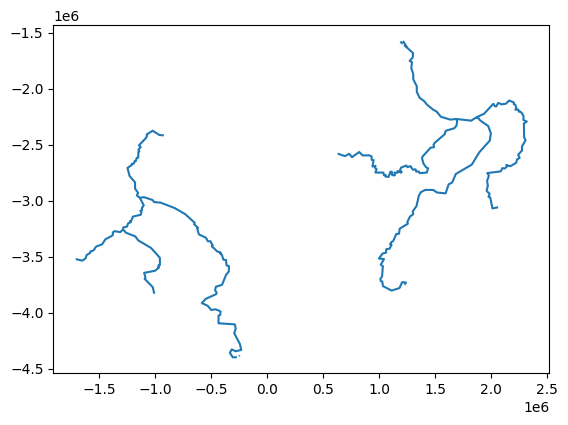

In [ ]:
systems.plot()

In [ ]:
# polygon for each system
systems.convex_hull

0    POLYGON ((1111476.898 -3800925.630, 1034119.83...
1    POLYGON ((-306634.030 -4396234.128, -1706906.0...
dtype: geometry

<Axes: >

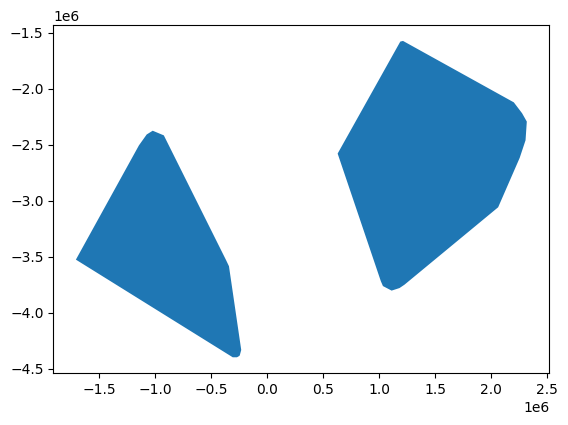

In [ ]:
# see them
systems.convex_hull.plot()

Now, a GDF for the hulls:

In [ ]:
systems_hulls=systems.convex_hull.to_frame()
systems_hulls['system']=['Lena', 'Ob']
systems_hulls.rename(columns={0:'geometry'},inplace=True)
systems_hulls=systems_hulls.set_geometry('geometry')
systems_hulls.crs="EPSG:3576"
systems_hulls

geometry system
0  POLYGON ((1111476.898 -3800925.630, 1034119.83...   Lena
1  POLYGON ((-306634.030 -4396234.128, -1706906.0...     Ob

Next, the distance matrix:

In [ ]:
distanceMatrixKM_sysHull_air=systems_hulls.set_index('system').geometry.apply\
(lambda g: largeAirports.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sysHull_air

name    Domodedovo International Airport  Gagarin International Airport  \
system                                                                    
Lena                         3636.781868                    3560.515634   
Ob                           1705.857116                    1296.397408   

name    Kazan International Airport  Koltsovo Airport  \
system                                                  
Lena                    3108.929661       2491.930020   
Ob                       983.296215        227.907791   

name    Krasnoyarsk International Airport  Kurumoch International Airport  \
system                                                                      
Lena                           808.198088                     3232.082428   
Ob                             477.690536                      968.536540   

name    Lipetsk Air Base  Novosibirsk Tolmachevo Airport  \
system                                                     
Lena         3791.743023                     1459.233194   
Ob           1719.937118                        0.000000   

name    Platov International Airport  Pulkovo Airport  \
system                                                  
Lena                     4200.566591      3620.359234   
Ob                       1926.078822      1916.380431   

name    Sochi International Airport  Ufa International Airport  \
system                                                           
Lena                    4547.900094                2885.434639   
Ob                      2180.952648                 563.386598   

name    Vladivostok International Airport  Vnukovo International Airport  \
system                                                                     
Lena                          1497.011575                    3650.706875   
Ob                            3668.582499                    1737.220343   

name    Zhukovsky International Airport  
system                                   
Lena                        3614.573364  
Ob                          1684.990679

In [ ]:
ob_system = distanceMatrixKM_sysHull_air.loc['Ob']
min_ob = ob_system.idxmin()
max_ob = ob_system.idxmax()

lena_system = distanceMatrixKM_sysHull_air.loc['Lena']
min_lena = lena_system.idxmin()
max_lena = lena_system.idxmax()

In [ ]:
mins=distanceMatrixKM_sysHull_air.idxmin(axis="columns")
maxs=distanceMatrixKM_sysHull_air.idxmax(axis="columns")

mins, maxs

(system
 Lena    Krasnoyarsk International Airport
 Ob         Novosibirsk Tolmachevo Airport
 dtype: object,
 system
 Lena          Sochi International Airport
 Ob      Vladivostok International Airport
 dtype: object)

In [ ]:
# plotting
base=systems_hulls.explore()
largeAirports[largeAirports.name.isin(mins)].explore(m=base,color='red',marker_kwds=dict(radius=10))
largeAirports[~largeAirports.name.isin(mins + maxs)].explore(m=base,color='blue',marker_kwds=dict(radius=5))
largeAirports[largeAirports.name.isin(maxs)].explore(m=base,color='green',marker_kwds=dict(radius=10))

#Exercise 4 (Distance using buffers)

1. Select a line map and a point one.

2. Get the buffer for the lines, select a distance.

3. Keep the points that are within the buffer (you might need to play with differnt distances until you show something interesting).  
    

In [ ]:
minMts=distanceMatrixKM_riv_air.loc['Ob'].min()*1000 # km

#the buffer is a polygon:
rivers[rivers.NAME=='Ob'].buffer(distance = minMts)

8    POLYGON ((-1237545.684 -2661697.116, -1237367....
dtype: geometry

In [ ]:
small_airports=airports[airports['kind']=='small_airport']
small_airports.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 0 entries
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   kind           0 non-null      object  
 1   latitude_deg   0 non-null      float64 
 2   longitude_deg  0 non-null      float64 
 3   elevation_ft   0 non-null      float64 
 4   region_name    0 non-null      object  
 5   municipality   0 non-null      object  
 6   geometry       0 non-null      geometry
dtypes: float64(3), geometry(1), object(3)
memory usage: 108.0+ bytes


In [ ]:
airports.kind.value_counts()

kind
large_airport    15
Name: count, dtype: int64

In [ ]:
# see buffer:
bufferAroundOb=rivers[rivers.NAME=='Ob'].buffer(distance = minMts)
bufferAsBase=bufferAroundOb.explore(color='red')
rivers[rivers.NAME=='Ob'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
largeAirports.explore(m=bufferAsBase,color='black')

In [ ]:
# see buffer:
bufferAroundOb=rivers[rivers.NAME=='Ob'].buffer(distance = minMts*2)
bufferAsBase=bufferAroundOb.explore(color='red', style_kwds={'weight': 3})
rivers[rivers.NAME=='Ob'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
largeAirports.explore(m=bufferAsBase,color='black')

Using the buffer (polygon) to keep the airports that are at that particular distance around the river:

In [ ]:
riversWithinBuffer=largeAirports.clip(mask=bufferAroundOb)
riversWithinBuffer

name           kind  latitude_deg  longitude_deg  \
4  Novosibirsk Tolmachevo Airport  large_airport     55.019756      82.618675   

   elevation_ft         region_name municipality  \
4         365.0  Novosibirsk Oblast  Novosibirsk   

                           geometry  
4  POINT (-493628.256 -3810450.645)

In [ ]:
# plotting the airports within buffer
bufferAsBase=bufferAroundOb.explore(color='red')
rivers[rivers.NAME=='Ob'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
riversWithinBuffer.explore(m=bufferAsBase,color='black')

In [ ]:
# minimum of all the minimum by row
distanceMatrixKM_riv_air.min(axis=1).min()

0.11922216278431494

In [ ]:
# using the previous value
minMinMts_5=5*distanceMatrixKM_riv_air.min(axis=1).min()*1000


allMinBuffer=rivers.buffer(distance = minMinMts_5).explore(color='red')
rivers.explore(m=allMinBuffer,color='blue',style_kwds={'weight':0.5})

In [ ]:
# you see all the buffer polygons:
riversAll_buf=rivers.buffer(distance = minMinMts_5*5)
riversAll_buf

0     POLYGON ((-3542973.829 -3013693.064, -3475250....
1     MULTIPOLYGON (((-2190908.470 -3621985.914, -21...
2     POLYGON ((-3110052.330 -2109857.201, -3110163....
3     POLYGON ((-3044517.077 -1973217.337, -3026207....
4     MULTIPOLYGON (((3164815.855 -3250167.561, 3164...
5     POLYGON ((-1023518.900 -3771245.745, -1095378....
6     POLYGON ((-1703434.309 -3518432.169, -1703198....
7     POLYGON ((949473.752 -3936136.392, 949225.573 ...
8     MULTIPOLYGON (((-1164869.849 -2953751.917, -11...
9     POLYGON ((2012310.652 -3070188.496, 2012022.41...
10    MULTIPOLYGON (((-267599.232 -2199531.050, -267...
11    POLYGON ((-2051061.557 -2806614.209, -2059021....
12    POLYGON ((-2850624.336 -1715292.535, -2850910....
13    POLYGON ((-2648674.583 -1790050.458, -2648393....
14    POLYGON ((-1568339.469 -2661197.554, -1568597....
15    MULTIPOLYGON (((1210605.047 -1573682.397, 1210...
16    POLYGON ((1699451.544 -2285542.711, 1699573.25...
17    POLYGON ((2246685.866 -771405.725, 2246955

Now keep large airports in buffer:

In [ ]:
allRiversWithinBuffs=largeAirports.clip(riversAll_buf)
allRiversWithinBuffs

name           kind  latitude_deg  longitude_deg  \
8  Kurumoch International Airport  large_airport     53.504902      50.164299   
7     Kazan International Airport  large_airport     55.606201      49.278702   

   elevation_ft            region_name municipality  \
8         477.0          Samara Oblast       Samara   
7         411.0  Republic of Tatarstan        Kazan   

                            geometry  
8  POINT (-2564134.582 -3073673.498)  
7  POINT (-2465976.887 -2864807.879)

<Axes: >

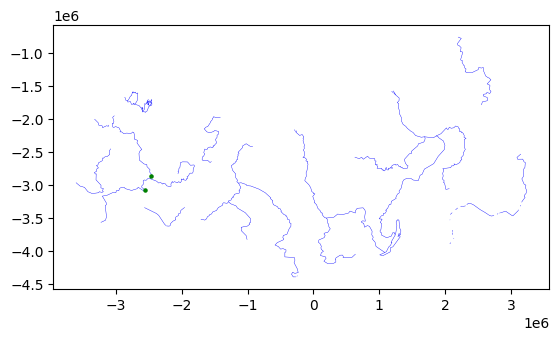

In [ ]:
# simple
base=riversAll_buf.plot(color='blue')
allRiversWithinBuffs.plot(ax=base, color='green', markersize=5)

In [ ]:
# folium

base=riversAll_buf.explore(color='yellow')
allRiversWithinBuffs.explore(m=base, color='green')

❤